<a href="https://www.kaggle.com/mickaelnarboni/ketodapp-exploration?scriptVersionId=85438654" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # ignore the warnings about file size
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/openfoodfacts/clean_p2.csv
/kaggle/input/openfoodfacts/en.openfoodfacts.org.products.csv


In [2]:
# import des données
drop_data_nan = (pd.read_csv('../input/openfoodfacts/clean_p2.csv',sep='\t', error_bad_lines=False, low_memory=False))

# Filtered Variables Observations

Now, we have a better dataset to make our first explorations.
We're going to start by working on the quantitative columns that make the most sense in order to draw conclusions for our application, as well as adding the categorical columns that make the most sense to describe our dataset.
Here are the columns we're going to work on:

*Categorical values*

* **product_name**
* **countries**
* **states**

*Quantitative values*

* **energy-kcal_100g**
* **energy_100g**  
* **fat_100g** 
* **saturated-fat_100g** 
* **carbohydrates_100g**   
* **sugars_100g**  
* **proteins_100g**   

In [3]:
# define the quantitative and categorical variables that are relevant sorted in a new dataframe

dataset = pd.DataFrame()
dataset['Product Name'] = drop_data_nan['product_name']
dataset['Countries'] = drop_data_nan['countries']
dataset['States'] = drop_data_nan['states']
dataset['Energy Kcal per 100g'] = drop_data_nan['energy-kcal_100g']
dataset['Energy per 100g'] = drop_data_nan['energy_100g']
dataset['Fat per 100g'] = drop_data_nan['fat_100g']
dataset['Saturated fat per 100g'] = drop_data_nan['saturated-fat_100g']
dataset['Carbohydrates per 100g'] = drop_data_nan['carbohydrates_100g']
dataset['Sugars per 100g'] = drop_data_nan['sugars_100g']
dataset['Proteins per 100g'] = drop_data_nan['proteins_100g']

dataset.head(10)

,Product Name,Countries,States,Energy Kcal per 100g,Energy per 100g,Fat per 100g,Saturated fat per 100g,Carbohydrates per 100g,Sugars per 100g,Proteins per 100g
0,Jus de grenade bio artisanal,France,"en:to-be-completed, en:nutrition-facts-complet...",58.0,243.0,0.50,0.10,14.00,13.0,0.20
1,Cèpes Extra Séchés 100g.,France,"en:to-be-completed, en:nutrition-facts-complet...",285.0,1192.0,2.20,0.00,22.00,15.0,32.00
2,Chipolatas persilles,en:fr,"en:to-be-completed, en:nutrition-facts-complet...",205.0,858.0,15.00,5.80,0.60,0.6,17.00
3,Popcorn,United States,"en:to-be-completed, en:nutrition-facts-complet...",424.0,1774.0,24.24,9.09,48.48,0.0,6.06
4,Miel de flores,en:es,"en:to-be-completed, en:nutrition-facts-complet...",1380.0,5774.0,0.00,0.00,80.80,70.0,0.40
5,Glace Yaourt Coulis Fraise,France,"en:to-be-completed, en:nutrition-facts-complet...",201.0,841.0,8.20,6.40,28.00,27.0,3.50
6,Porridge Berry bread,en:ch,"en:to-be-completed, en:nutrition-facts-complet...",234.0,979.0,1.50,0.20,44.00,6.6,8.70
7,"Saumon au lait de coco et cumin, pomme de terr...",France,"en:to-be-completed, en:nutrition-facts-complet...",84.0,352.0,3.40,1.60,5.70,2.9,6.80
8,MAGGI Soupe déshydratée Halal Chorba 110g en b...,France,"en:to-be-completed, en:nutrition-facts-complet...",40.0,167.0,0.80,0.40,6.40,1.4,1.50
9,Chipolata biologique,en:lu,"en:to-be-completed, en:nutrition-facts-complet...",24.0,100.0,19.90,7.70,0.10,0.0,0.00


# Univariate Analysis for Quantitative Values

We're doing some univariate analysis on the quantitative variables contained in our *dataset* dataframe.
Our analysis will include a graph using matplot and seaborn libraries for each variable.

For convenience, we applied some adjustments.

In the boxplot distribution, we have limited the **x axis** depending on the concentration of the values to have a readable graph for each variable.
This distribution allows us to notice the outliers over Q4 for each variable which will be useful for out next step.

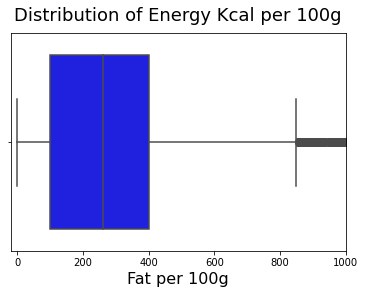

In [4]:
# Univariate Analysis of Energy Kcal per 100g

#Distribution using boxplot

sns.boxplot(dataset['Energy Kcal per 100g'],color="blue")
plt.xlabel("Fat per 100g", size=16)
plt.title("Distribution of Energy Kcal per 100g", size=18, y=1.03)
plt.xlim([-20, 1000])
plt.show()

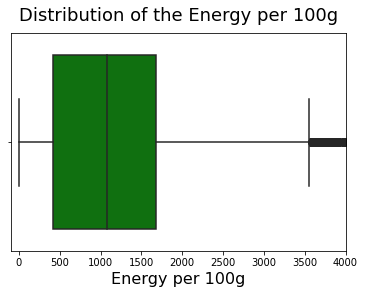

In [5]:
# Univariate Analysis of Energy per 100g

#Distribution using boxplot

sns.boxplot(dataset['Energy per 100g'],color="green")
plt.xlabel("Energy per 100g", size=16)
plt.title("Distribution of the Energy per 100g", size=18, y=1.03)
plt.xlim([-100, 4000])
plt.show()

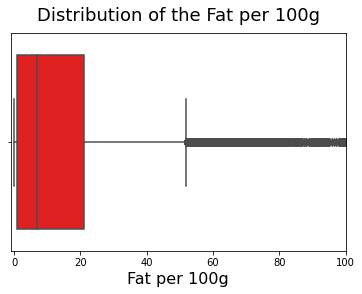

In [6]:
# Univariate Analysis of Fat per 100g

#Distribution using boxplot

sns.boxplot(dataset['Fat per 100g'],color="red")
plt.xlabel("Fat per 100g", size=16)
plt.title("Distribution of the Fat per 100g", size=18, y=1.03)
plt.xlim([-1, 100])
plt.show()

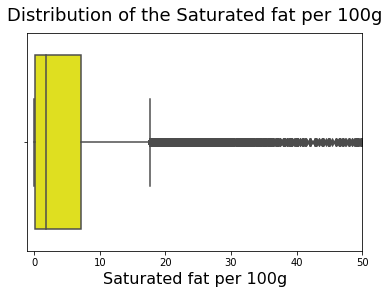

In [7]:
# Univariate Analysis of Saturated fat per 100g

#Distribution using boxplot

sns.boxplot(dataset['Saturated fat per 100g'],color="yellow")
plt.xlabel("Saturated fat per 100g", size=16)
plt.title("Distribution of the Saturated fat per 100g", size=18, y=1.03)
plt.xlim([-1, 50])
plt.show()

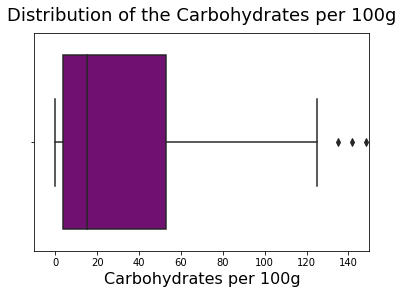

In [8]:
# Univariate Analysis of Carbohydrates per 100g

#Distribution using boxplot

sns.boxplot(dataset['Carbohydrates per 100g'],color="purple")
plt.xlabel("Carbohydrates per 100g", size=16)
plt.title("Distribution of the Carbohydrates per 100g", size=18, y=1.03)
plt.xlim([-10, 150])
plt.show()



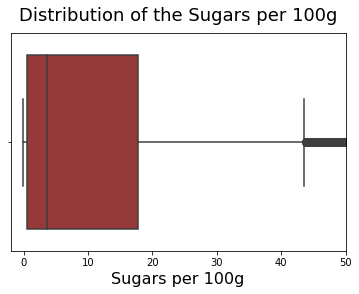

In [9]:
# Univariate Analysis of Sugars per 100g

#Distribution using boxplot

sns.boxplot(dataset['Sugars per 100g'],color="brown")
plt.xlabel("Sugars per 100g", size=16)
plt.title("Distribution of the Sugars per 100g", size=18, y=1.03)
plt.xlim([-2, 50])
plt.show()

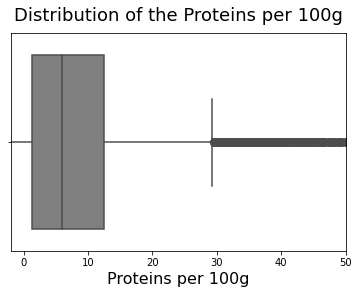

In [10]:
# Univariate Analysis of Proteins per 100g

#Distribution using boxplot

sns.boxplot(dataset['Proteins per 100g'],color="gray")
plt.xlabel("Proteins per 100g", size=16)
plt.title("Distribution of the Proteins per 100g", size=18, y=1.03)
plt.xlim([-2, 50])
plt.show()


# Univariate Analysis for Categorical Values

We create a dataframe called *count_countries* that return the countries as the index and the count of products as a column.
In order to clarify our graph for our analysis on the countries, we  decide to drop all the countries variable using a boolean condition below 200 count values. It allows us to keep enough countries to make our observations while having a readable graph (45 countries).
We use **matplotlib** to display the results. 

Then, we create a **countplot()** to observe the count of products per country. 

In [11]:
count_countries = pd.DataFrame(dataset['Countries'].value_counts().rename_axis(axis=0, index='Countries')).set_axis(["Count"], axis='columns')
count_countries.describe()

,Count
count,2750.000000
mean,70.481455
std,1142.474763
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,42481.000000


In [12]:
new_cc = count_countries.query("Count >= 200")
new_cc.head()

,Count
Countries,
France,42481
United States,30795
en:fr,20858
en:es,10484
en:it,9840


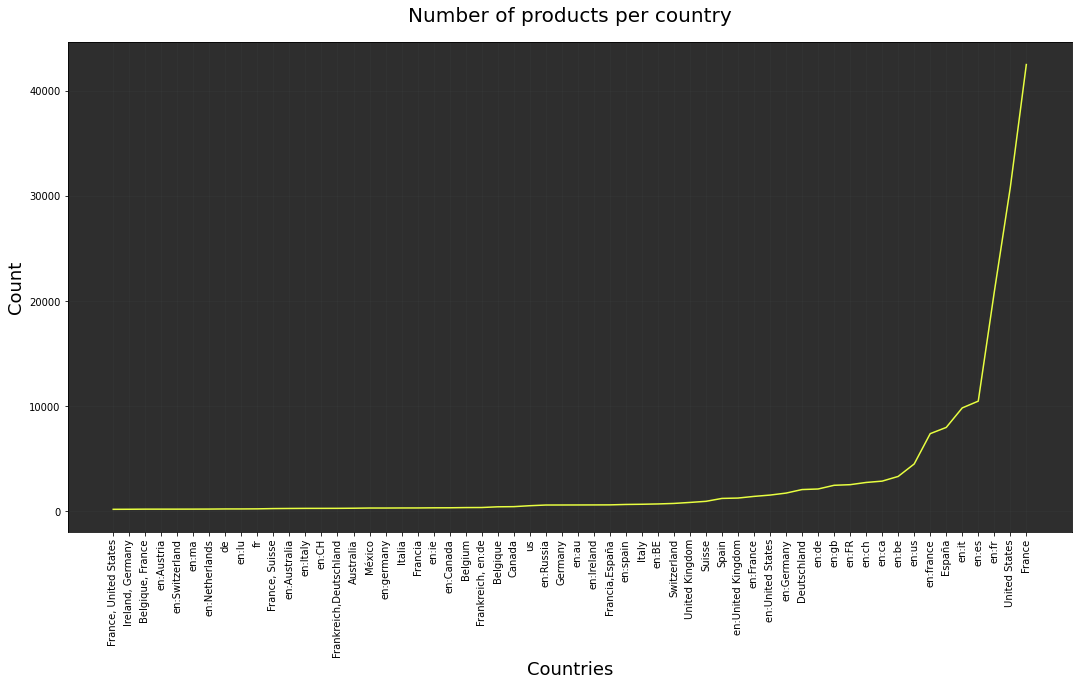

In [13]:
to_plot = new_cc.sort_values(by=['Count'])
fig, ax = plt.subplots(figsize=(18, 9))
ax.set_facecolor("#2E2E2E")
plt.title('Number of products per country', fontsize=20, y=1.03)
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.grid(True, color="#93a1a1", alpha=0.05)
plt.xticks(rotation=90) # this line allow us to rotate the x_labels so they can be readable
plt.plot(to_plot.index.values,to_plot['Count'],color="#E8FF41"); 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, 'France'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'en:fr'),
  Text(3, 0, 'en:es'),
  Text(4, 0, 'en:it'),
  Text(5, 0, 'España'),
  Text(6, 0, 'en:france'),
  Text(7, 0, 'en:us'),
  Text(8, 0, 'en:be'),
  Text(9, 0, 'en:ca'),
  Text(10, 0, 'en:ch'),
  Text(11, 0, 'en:FR'),
  Text(12, 0, 'en:gb'),
  Text(13, 0, 'en:de'),
  Text(14, 0, 'Deutschland'),
  Text(15, 0, 'en:Germany'),
  Text(16, 0, 'en:United States'),
  Text(17, 0, 'en:France'),
  Text(18, 0, 'en:United Kingdom'),
  Text(19, 0, 'Spain'),
  Text(20, 0, 'Suisse'),
  Text(21, 0, 'United Kingdom'),
  Text(22, 0, 'Switzerland'),
  Text(23, 0, 'en:BE'),
  Text(24, 0, 'Italy'),
  Text(25, 0, 'en:spain'),
  Text(26, 0, 'Francia,España'),
  Text(27, 0, 'e

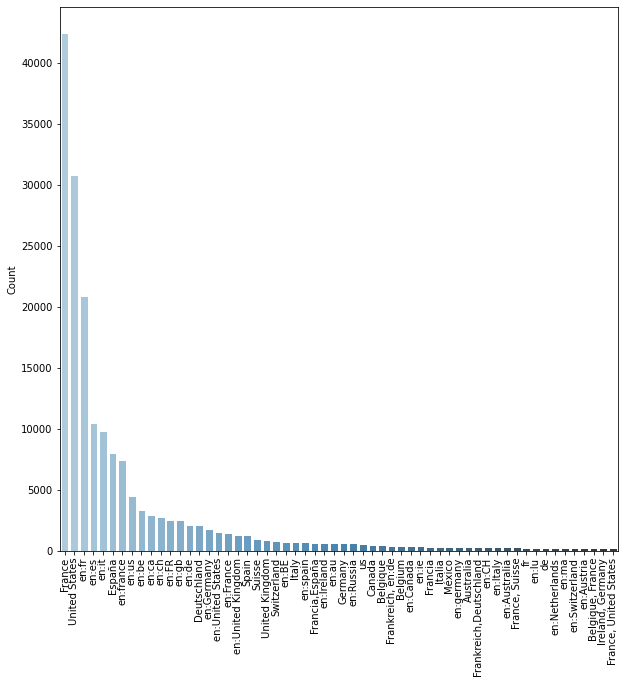

In [14]:
# We do a barplot displaying the distribution of the number of products per country
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('darkgrid')
sns.barplot(x=new_cc.index.values, y=new_cc["Count"], palette="Blues_d")
plt.xticks(rotation=90)

# Removing the Outliers on Quantitative Variables

As explaines previously, the boxplot graphs allowed us to visually determine the outliers - they are the ones that we can see after the Q4 bar on the diagrams.
Now, we're going to remove these extreme values called outliers to purify our data using the interquartile range method. 

**Some notes about the IQR method:**

This method allows us to detect outliers in our distribution on quantitative variables. IQR method is based on the Gaussian distribution (normal distribution). A normal distribution descibes the repartition of the data around the mean value and tells us that the whole data is found below three times the standard deviation of the mean value which means that the part of the data above it is considered as outliers: outliers>3xsigma of mu with sigma the standard deviation and mu the mean. 

In the IQR method, the choice of defining a scale equal to 1.5 is used because it gives us a range between -2.7xsigma and +2.7xsigma (which is pretty closed to the scale of 3 in the Gaussian distribution) while keeping a certain symmetry in the outliers detection.

Hence, we're using these two following delimiters to detect our outliers:
Lower Bound: (Q1 - 1.5 * IQR)
Upper Bound: (Q3 + 1.5 * IQR)

By using *dataset_out.describe()*, we clearly notice the difference in the **max** values with *dataset.describe()*. 



In [15]:
# IQR detection and method
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print('Lower bound for each quantitative variable:')
print(lower_bound) 
print('Upper bound for each quantitative variable:')
print(upper_bound) 
# we eliminate all the values above it for each column using IQR, we can notice them with the max() function
dataset_out =dataset[~((dataset<(Q1-1.5*IQR)) | (dataset>(Q3+1.5*IQR)))]
dataset_out.describe()

Lower bound for each quantitative variable:
Energy Kcal per 100g      -350.0000
Energy per 100g          -1466.0000
Fat per 100g               -29.8375
Saturated fat per 100g     -10.4000
Carbohydrates per 100g     -70.7500
Sugars per 100g            -25.2000
Proteins per 100g          -15.5000
dtype: float64
Upper bound for each quantitative variable:
Energy Kcal per 100g       850.0000
Energy per 100g           3558.0000
Fat per 100g                51.8625
Saturated fat per 100g      17.6000
Carbohydrates per 100g     127.2500
Sugars per 100g             43.6000
Proteins per 100g           29.3000
dtype: float64


,Energy Kcal per 100g,Energy per 100g,Fat per 100g,Saturated fat per 100g,Carbohydrates per 100g,Sugars per 100g,Proteins per 100g
count,153059.000000,158023.000000,153355.000000,142475.000000,159010.000000,141175.000000,154654.000000
mean,265.952901,1110.009083,11.332876,3.442452,28.073219,7.750359,7.648543
std,184.306558,770.250594,12.635642,4.467760,27.937754,10.676466,7.440986
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,-8.330000
25%,100.000000,418.000000,0.600000,0.100000,3.500000,0.500000,1.200000
50%,257.000000,1067.000000,6.200000,1.400000,15.200000,2.900000,5.710000
75%,398.000000,1661.000000,19.350000,5.200000,53.000000,10.710000,11.800000
max,850.000000,3556.000000,51.820000,17.600000,125.000000,43.590000,29.299999


# Imputation for Variables Using Median

We decide to replace the NaN values of our quantitative values that we're going to keep for our application using median() method.  

We specifically use it after removing the outliers so we can better normalize our data - the median() will be more "true" than before removing the outliers. 

The mean() is usually less exact than median() and 0 imputation might create an issue of overfitting once we train a predictive model.

The quantitative variables we're going to keep for later are: **Fat**, **Carbohydrates** and **Proteins**

We notice using .describe() that the statistical values changed from our *dataset_out*.

In [16]:
dataset_out['Fat per 100g'].fillna(dataset_out['Fat per 100g'].median(), inplace=True)
dataset_out['Proteins per 100g'].fillna(dataset_out['Proteins per 100g'].median(), inplace=True)
dataset_out['Carbohydrates per 100g'].fillna(dataset_out['Carbohydrates per 100g'].median(), inplace=True)
dataset_out.describe()

,Energy Kcal per 100g,Energy per 100g,Fat per 100g,Saturated fat per 100g,Carbohydrates per 100g,Sugars per 100g,Proteins per 100g
count,153059.000000,158023.000000,194226.000000,142475.000000,194226.000000,141175.000000,194226.000000
mean,265.952901,1110.009083,10.252764,3.442452,25.739117,7.750359,7.253581
std,184.306558,770.250594,11.421015,4.467760,25.760388,10.676466,6.685583
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,-8.330000
25%,100.000000,418.000000,1.500000,0.100000,5.000000,0.500000,2.470000
50%,257.000000,1067.000000,6.200000,1.400000,15.200000,2.900000,5.710000
75%,398.000000,1661.000000,15.000000,5.200000,46.000000,10.710000,9.448611
max,850.000000,3556.000000,51.820000,17.600000,125.000000,43.590000,29.299999


# New Data Visualization

Once we used the interquartile range, we're using our *dataset_out* dataframe (without outliers) to display our data in two different ways:
* Boxplot distribution using **.boxplot()**
* Displot distribution using **.displot()**

Note that for the displot distribution, we used **KDE** parameters which stands for Kernel Density Estimate and shows us the estimate density curve based on KDE equation. 



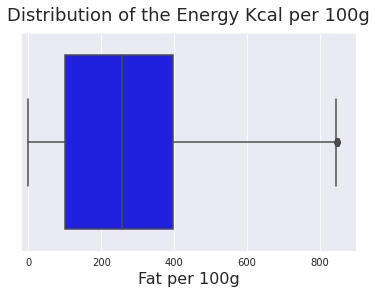

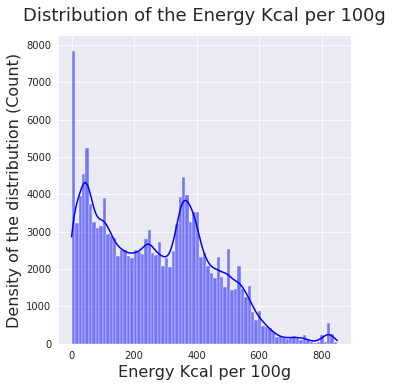

In [17]:
# Univariate Analysis of Energy Kcal per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Energy Kcal per 100g'],color="blue")
plt.xlabel("Fat per 100g", size=16)
plt.title("Distribution of the Energy Kcal per 100g", size=18, y=1.03)
plt.xlim([-20,900])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Energy Kcal per 100g'].sort_values(ascending=True), kde=True, color="blue")
plt.title("Distribution of the Energy Kcal per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Energy Kcal per 100g", size=16)
plt.show()

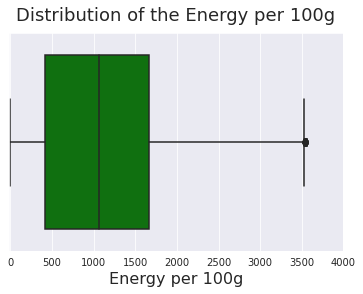

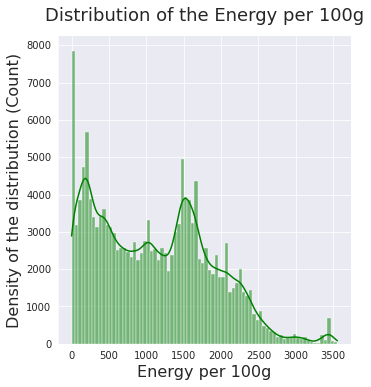

In [18]:
# Univariate Analysis of Energy per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Energy per 100g'],color="green")
plt.xlabel("Energy per 100g", size=16)
plt.title("Distribution of the Energy per 100g", size=18, y=1.03)
plt.xlim([-20, 4000])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Energy per 100g'].sort_values(ascending=True), kde=True, color="green")
plt.title("Distribution of the Energy per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Energy per 100g", size=16)
plt.show()

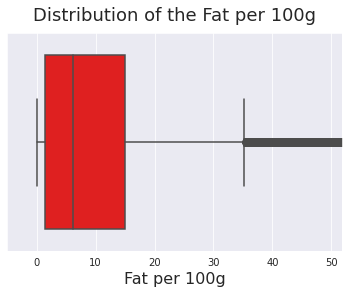

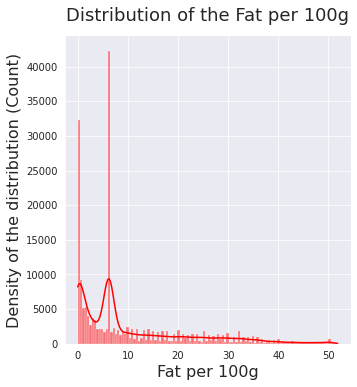

In [19]:
# Univariate Analysis of Fat per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Fat per 100g'],color="red")
plt.xlabel("Fat per 100g", size=16)
plt.title("Distribution of the Fat per 100g", size=18, y=1.03)
plt.xlim([-5, max(dataset_out['Fat per 100g'])])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Fat per 100g'].sort_values(ascending=True), kde=True, color="red")
plt.title("Distribution of the Fat per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Fat per 100g", size=16)
plt.show()

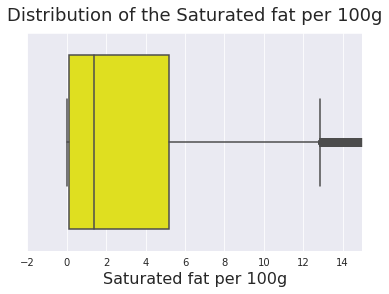

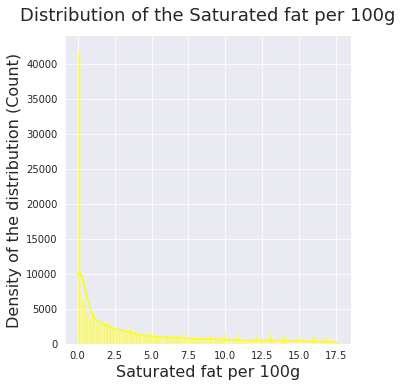

In [20]:
# Univariate Analysis of Saturated fat per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Saturated fat per 100g'],color="yellow")
plt.xlabel("Saturated fat per 100g", size=16)
plt.title("Distribution of the Saturated fat per 100g", size=18, y=1.03)
plt.xlim([-2, 15])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Saturated fat per 100g'].sort_values(ascending=True), kde=True, color="yellow")
plt.title("Distribution of the Saturated fat per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Saturated fat per 100g", size=16)
plt.show()

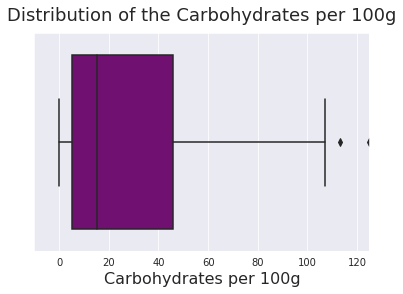

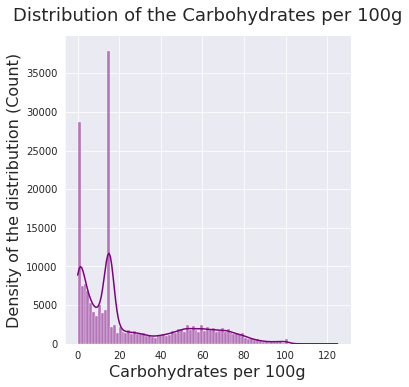

In [21]:
# Univariate Analysis of Carbohydrates per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Carbohydrates per 100g'],color="purple")
plt.xlabel("Carbohydrates per 100g", size=16)
plt.title("Distribution of the Carbohydrates per 100g", size=18, y=1.03)
plt.xlim([-10, max(dataset_out['Carbohydrates per 100g'])])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Carbohydrates per 100g'].sort_values(ascending=True), kde=True, color="purple")
plt.title("Distribution of the Carbohydrates per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Carbohydrates per 100g", size=16)
plt.show()

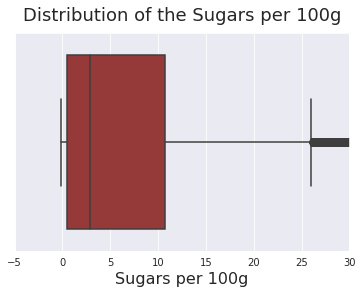

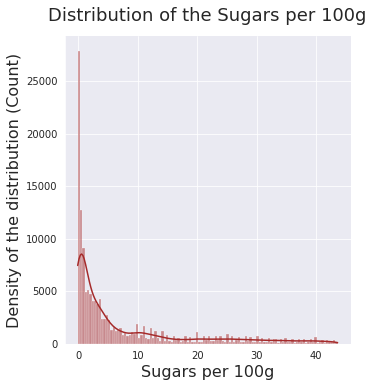

In [22]:
# Univariate Analysis of Sugars per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Sugars per 100g'],color="brown")
plt.xlabel("Sugars per 100g", size=16)
plt.title("Distribution of the Sugars per 100g", size=18, y=1.03)
plt.xlim([-5, 30])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Sugars per 100g'].sort_values(ascending=True), kde=True, color="brown")
plt.title("Distribution of the Sugars per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Sugars per 100g", size=16)
plt.show()

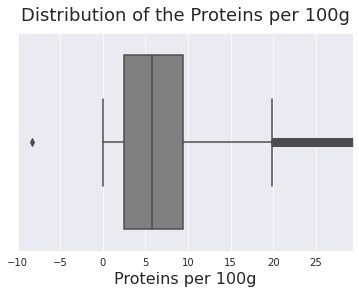

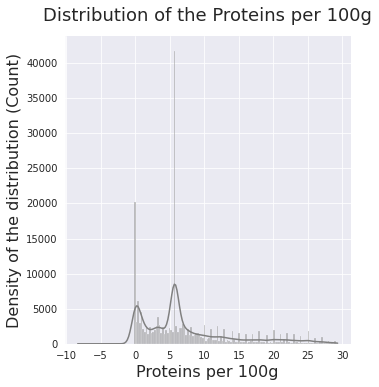

In [23]:
# Univariate Analysis of Proteins per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Proteins per 100g'],color="gray")
plt.xlabel("Proteins per 100g", size=16)
plt.title("Distribution of the Proteins per 100g", size=18, y=1.03)
plt.xlim([-10, max(dataset_out['Proteins per 100g'])])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Proteins per 100g'].sort_values(ascending=True), kde=True, color="gray")
plt.title("Distribution of the Proteins per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Proteins per 100g", size=16)
plt.show()

# Bivariate Analysis 

Our bivariate analysis will help us to focus on the important data for our application.
The goal is to provide insights and product recommendations for people doing a ketogenic diet based on their locations (per country).

The ketogenic or “keto” diet is a low-carbohydrate, fat-rich eating plan that has been used for centuries to treat specific medical conditions. In the 19th century, the ketogenic diet was commonly used to help control diabetes.

For 2000 calories consumed per day, a ketogenic diet is generally made of:
- Carbohydrates: 20 to 50 grams per day
- Fat: 150 to 170 grams per day
- Proteins: 60 to 80 grams per day

Source: https://www.hsph.harvard.edu/nutritionsource/healthy-weight/diet-reviews/ketogenic-diet/


We're going to study the following pairs of variables by doing a **pairplot()** and by doing a multivariate analysis with the variables (Fat, Proteins, Carbohydrates):
- Carbohydrates/Fat
- Carbohydrates/Proteins
- Proteins/Fat

After that we'll cross the results with the countries where we can find our product recommendations so people can use it in any countries!



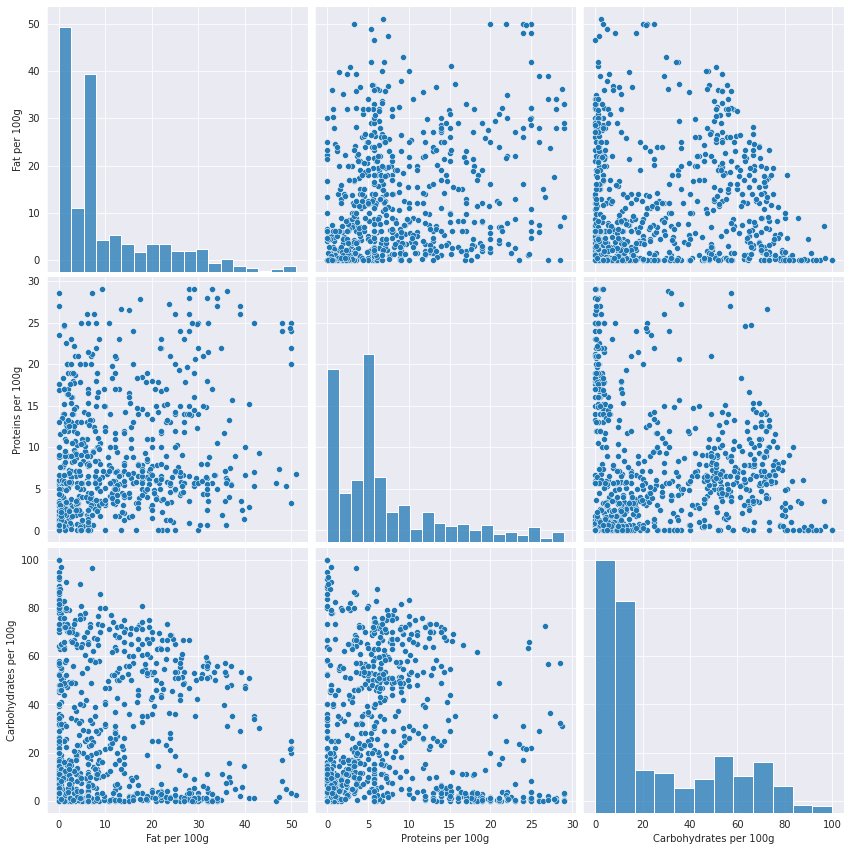

In [24]:
# we reduce the number of variable of our dataset_clean to fit our application needs
# we use .dropna() function of our library to have practical data for our application
dataset_app = dataset_out[['Product Name','Countries','Fat per 100g','Proteins per 100g','Carbohydrates per 100g']].dropna()
sns.pairplot(dataset_app.sample(1000),size=4)

In [25]:
dataset_app.head(10)

,Product Name,Countries,Fat per 100g,Proteins per 100g,Carbohydrates per 100g
0,Jus de grenade bio artisanal,France,0.50,0.20,14.00
1,Cèpes Extra Séchés 100g.,France,2.20,5.71,22.00
2,Chipolatas persilles,en:fr,15.00,17.00,0.60
3,Popcorn,United States,24.24,6.06,48.48
4,Miel de flores,en:es,0.00,0.40,80.80
5,Glace Yaourt Coulis Fraise,France,8.20,3.50,28.00
6,Porridge Berry bread,en:ch,1.50,8.70,44.00
7,"Saumon au lait de coco et cumin, pomme de terr...",France,3.40,6.80,5.70
8,MAGGI Soupe déshydratée Halal Chorba 110g en b...,France,0.80,1.50,6.40
9,Chipolata biologique,en:lu,19.90,0.00,0.10


# Correlation Matrix

We use seaborn library with **heatmap()** to define our correlation matrix using Pearson method. 

The Pearson method gives us indications about the linearity between two variables.

 - A positive correlation value between two variables indicates a linear relation between the two variables and the fact that they describe the same characteristics
 
 - A negative correlation value between two variables indicates an anticorrelation bewteewn the two variables which means that they describe different characteristics or are not clearly defined


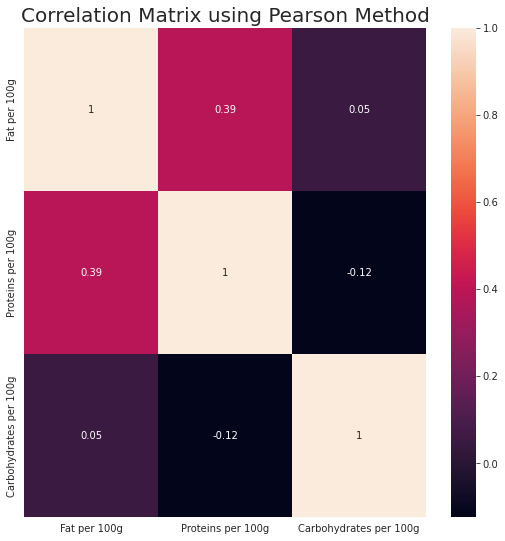

In [26]:
corr_df = dataset_app.corr(method ='pearson')
plt.figure(figsize=(9, 9))
plt.title('Correlation Matrix using Pearson Method',fontsize=20)
sns.heatmap(corr_df, annot=True)
plt.show()

# Multivariate Analysis (PCA)

We use PCA to make a multivariate analysis of our quantitative variables.

The prerequisite for a PCA is to have a normalized set of data - this is why we apply .StandardScaler().
Another prerequisite is to have approximately the mean equals to 0 and the standard deviation equals to 1. 


In [27]:
from sklearn.preprocessing import StandardScaler

x = dataset_app.loc[:, ['Fat per 100g','Proteins per 100g','Carbohydrates per 100g']]
x = StandardScaler().fit_transform(x)

We use are going to check is our StandardScaler has been used properly on our dataset and normalized our data.
The mean needs to be zero and the standard deviation needs to be one.

We notice that the mean is almost equals to zero that we'll consider correct for our PCA. Standard deviation is equals to on

In [28]:
np.mean(x),np.std(x)

(-5.645512491077236e-17, 0.9999999999999998)

In [29]:
normalized_dataset_app = pd.DataFrame(x,columns={'Fat per 100g': '0','Proteins per 100g': '1','Carbohydrates per 100g': '2'})
normalized_dataset_app.head()

,Fat per 100g,Proteins per 100g,Carbohydrates per 100g
0,-0.853826,-1.054770,-0.456000
1,-0.705039,-0.230812,-0.145570
2,0.415238,1.457480,-0.975970
3,1.223939,-0.178473,0.881953
4,-0.897586,-1.024863,2.136090


Now that our dataset has been normalized for PCA, we can use it using sklearn library with n=2 components

In [30]:
from sklearn.decomposition import PCA
pca_dataset_app = PCA(n_components=2)
principalComponents_dataset = pca_dataset_app.fit_transform(normalized_dataset_app)
principal_components_Df = pd.DataFrame(data = principalComponents_dataset, columns = ['Principal Component 1', 'Principal Component 2'])
principal_components_Df.head()

,Principal Component 1,Principal Component 2
0,-1.276462,-0.580167
1,-0.627864,-0.324156
2,1.461983,-0.950367
3,0.588675,1.218598
4,-1.642919,1.865473


The **.explained_variance_ratio_** parameter returns a vector of the variance explained by each dimension.
From the below output, we can observe that the principal component 1 holds **46.4%** of the information while the principal component 2 holds **34.2%** of the information. Also, the other point to note is that while projecting three-dimensional data (**Fat, Proteins, Carbohydrates**) to a two-dimensional data, **19.4%** information was lost.
So, our principal components explain a cumulative **80.6%** of the variable which is acceptable to avoid overfitting 



In [31]:
print('Explained variation per principal component: {}'.format(pca_dataset_app.explained_variance_ratio_))

Explained variation per principal component: [0.46460061 0.34290534]


# Multivariate Analysis (ANOVA)

ANOVA allows us to make a multivariate analysis between quantitative variables and a categorical variable.

The overall equation to apply ANOVA is the following:

**Y = alpha(i) + mu + epsilon**

with alpha(i) the adjustment 
mu the reference of the categorical variable
epsilon the error

To do so, we gotta calculate:

- SCT: Total Sum of Squares
- SCE: Sum of Squares of the Model
- SCR: Sum of Squares of the Error


It allows us to calculate:

eta^2 = V(interclass)/V(total)

If eta^2 = 0, then there is no relationship between the variables.
If eta^2 = 1, then the means of the classes are different from one another but within a class, the values are very closed from the mean of the class (meaning there is a great relation between the two variables).

Now, we're going to use this method between our categorical variable: *Countries* and our quantitative variable: *Fat per 100g*.

We notice a result of **0.02%** which means that there is almost no relation between those two variables

In [32]:
X = "Countries" # categorical
Y = "Fat per 100g" # quantitative

sample_anova = dataset_app[dataset_app["Fat per 100g"] < 100] # we make sure we do our analysis based on filtered data

def eta_squared(x,y):
    mean_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'mean_classe': yi_classe.mean()})
    SCT = sum([(yj-mean_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['mean_classe']-mean_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sample_anova[X],sample_anova[Y])

0.020090452116155674

# Multivariate Analysis (Chi-2)

The Chi-2 analysis allow us to analyze two categorical variables.

We obtain a table that contains a value between 0 and 1 for each columns (Countries).

In our case, all the values are very closed to 0, which means that there is no dependance between the two categorical variables: **Product Name** and **Countries**.

In [33]:
# alléger la mémoire
dataset_chi2 = dataset_app.sample(n=1000)

In [34]:
X = "Product Name"
Y = "Countries"

cont = dataset_chi2[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
tx = dataset_chi2[X].value_counts()
ty = dataset_chi2[Y].value_counts()
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["Product Name"]
ty.columns = ["Countries"]
n = len(dataset_chi2)
indep = np.outer(tx,ty.T) / n
c = cont.fillna(0) # We replace NaN values by 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
table.head(5)

Countries,"Algérie,en:algeria",Allemagne,Argentina,Australia,"Belgien,Frankreich",Belgique,"Belgique,France",Belgium,"Belgium, Germany",België,...,pl,th,us,"Émirats arabes unis, en:france",Österreich,"Österreich,Deutschland,en:austria",Česko,Ελλάδα,საქართველო,中华人民共和国
Product Name,,,,,,,,,,,,,,,,,,,,,
1/4 de jambon cuit superieur fumé,1.042932e-06,6.967673e-07,4.571149e-07,2.574045e-07,1.997104e-07,1.952724e-07,1.242642e-07,1.198262e-07,8.432216e-08,6.213212e-08,...,4.438008e-09,4.438008e-09,4.438008e-09,4.438008e-09,4.438008e-09,4.438008e-09,4.438008e-09,4.438008e-09,4.438008e-09,4.438008e-09
10 Saucisses fumées cuites au bois de hêtre,6.952880e-07,4.645115e-07,3.047432e-07,1.716030e-07,1.331402e-07,1.301816e-07,8.284282e-08,7.988415e-08,5.621477e-08,4.142141e-08,...,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09
100% orange juice,6.952880e-07,4.645115e-07,3.047432e-07,1.716030e-07,1.331402e-07,1.301816e-07,8.284282e-08,7.988415e-08,5.621477e-08,4.142141e-08,...,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09
100% white grape juice,6.952880e-07,4.645115e-07,3.047432e-07,1.716030e-07,1.331402e-07,1.301816e-07,8.284282e-08,7.988415e-08,5.621477e-08,4.142141e-08,...,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09
2 Pavés au poivre,6.952880e-07,4.645115e-07,3.047432e-07,1.716030e-07,1.331402e-07,1.301816e-07,8.284282e-08,7.988415e-08,5.621477e-08,4.142141e-08,...,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09,2.958672e-09


# Application

Our application called **Ketodapp** allows the users to add their groceries on a list in the app which show them the addition of fat, proteins and carbohydrates in their grocery list so they know if they exceed their weekly consumption in their keto diet. 
They will use Ketodapp to plan their daily, weekly, monthly groceries. We can even think about adding QR code for each product so they can use it while doing their groceries to see if they exceed the authorized fat, proteins and carbs or if they still have space left to buy more products. 

When creating an account on the application, we can have the users setting the parameters they want for their keto diet and input the correct amount of fat, proteins and carbs per day, week and month that they desire to respect.

# Function 1

This function take in input the product name the user wants to enter in the app and returns the values of fat, proteins and carbohydrates contained in that particular product.
We notice that this function has some limits because some products have the same name but their quantitative values are different.

In [35]:
# function 1

def ketodapp1(x):
    f = dataset_app.loc[dataset_app['Product Name'] == x]['Fat per 100g'].values[0]
    p = dataset_app.loc[dataset_app['Product Name'] == x]['Proteins per 100g'].values[0]
    c = dataset_app.loc[dataset_app['Product Name'] == x]['Carbohydrates per 100g'].values[0]
    print(x,'contains:',f,'g of Fat per 100g,',p,'g of Proteins per 100g,',c,'g of Carbohydrates per 100g.')
   
    
#example
ketodapp1('Jus de grenade bio artisanal')
    

Jus de grenade bio artisanal contains: 0.5 g of Fat per 100g, 0.2 g of Proteins per 100g, 14.0 g of Carbohydrates per 100g.


# Function 2

The following function take as input, the iD of the product represented by the index of the dataframe and returns the product name, fat per 100g, carbohydrates per 100g and proteins per 100g. 
Using this function, we avoid the trap of having a product name that exist in duplicates as we saw with function 1. 
Thinking ahead, we can imagine that the iD of each product can be scanned as QR code in a supermarket. 

In [36]:
# function 2

def ketodapp2(x):
    
    cc = dataset_app.loc[dataset_app.index == x]['Countries'].values[0]
    f = dataset_app.loc[dataset_app.index == x]['Fat per 100g'].values[0]
    p = dataset_app.loc[dataset_app.index == x]['Proteins per 100g'].values[0]
    c = dataset_app.loc[dataset_app.index == x]['Carbohydrates per 100g'].values[0]
    print(dataset_app.loc[dataset_app.index == x]['Product Name'].values[0],'imported from',cc,'contains:',
          f,'g of Fat per 100g,',p,'g of Proteins per 100g,',c,'g of Carbohydrates per 100g.')
   
    
#example
ketodapp2(108)

Sel fin imported from en:fr contains: 6.2 g of Fat per 100g, 5.71 g of Proteins per 100g, 15.2 g of Carbohydrates per 100g.


# Prepare for Modeling

Our cleaning and exploration steps are done, we export our dataset as a csv to work on our predictions and modeling


In [37]:
import os
os.chdir(r'./')
dataset_app.to_csv('ketodapp.csv',sep = '\t',index = True)

In [38]:
from IPython.display import FileLink
FileLink(r'ketodapp.csv')

/kaggle/working/ketodapp.csv